In [1]:
import pandas as pd
from sqlalchemy import create_engine
import yfinance as yf
#FRED
from fredapi import Fred
fred_key = ''

In [2]:
engine = create_engine('sqlite:///Database.db')

In [12]:
fred_ids = ['WALCL','WTREGEN', 'RRPONTSYD', 'SP500']

In [13]:
def fred_downloader(ids, start):
    try:
        from fredapi import Fred
        fred_key = '9a9c69745bc32b9678c0207caa1a119a'
        fred = Fred(api_key=fred_key)
        all_results = []
        for myid in ids:
            results = fred.get_series(series_id=myid, observation_start=start)
            results = results.to_frame(name=myid)
            all_results.append(results)
        df = pd.concat(all_results, axis=1)
        df = df.fillna(method='bfill')
        df = df.fillna(method='ffill')
        df = df.dropna()
        df['NET_LIQ'] = (df.WALCL - df.WTREGEN * 1000 - df.RRPONTSYD * 1000)/(1000*1000)
        df['SP_FV'] = df.SP500 - ((df.WALCL - df.WTREGEN * 1000 - df.RRPONTSYD * 1000)/1000/1.1-1625)
        return df
    except:
        pass

In [14]:
fred_downloader(fred_ids, '2000-01-01')

,WALCL,WTREGEN,RRPONTSYD,SP500,NET_LIQ,SP_FV
2000-01-05,719542.0,20.943,2.500,1426.19,0.696099,2418.372727
2000-01-12,719542.0,5.326,2.500,1426.19,0.711716,2404.175455
2000-01-19,719542.0,5.390,2.500,1426.19,0.711652,2404.233636
2000-01-26,719542.0,7.205,2.500,1426.19,0.709837,2405.883636
2000-02-02,719542.0,6.131,2.500,1426.19,0.710911,2404.907273
...,...,...,...,...,...,...
2022-12-26,8551169.0,427.926,2221.259,3829.25,5.901984,88.810000
2022-12-27,8551169.0,427.926,2221.259,3829.25,5.901984,88.810000
2022-12-28,8551169.0,427.926,2293.003,3783.22,5.830240,108.001818
2022-12-29,8551169.0,427.926,2308.319,3849.28,5.814924,187.985455


In [15]:
def sql_importer_fred(symbol, start='2022-01-01'):
    try:
        max_date = pd.read_sql(f'SELECT MAX(Date) FROM {symbol}', engine).values[0][0]
        print(max_date)
        new_data = yf.download(symbol, start=pd.to_datetime(max_date))
        new_rows = new_data[new_data.index > max_date]
        new_rows.to_sql(symbol, engine, if_exists='append')
        print(str(len(new_rows)) + ' new rows imported to DB')
    except:
        new_data = yf.download(symbol, start=start)
        new_data.to_sql(symbol, engine)
        print(f'New table created for {symbol} with {str(len(new_data))} rows')

In [18]:
for id in df.columns:
    df.to_sql(id, engine)
    print(id + ' imported')

WALCL imported
WTREGEN imported
RRPONTSYD imported
SP500 imported
NET_LIQ imported
SP_FV imported


In [48]:
fred_df = pd.read_sql('WALCL', engine).set_index('index')

In [49]:
fred_df

,WALCL,WTREGEN,RRPONTSYD,SP500,NET_LIQ,SP_FV
index,,,,,,
1986-01-08,719542.0,4.140,2.500,1426.19,0.712902,2403.097273
1986-01-15,719542.0,5.032,2.500,1426.19,0.712010,2403.908182
1986-01-22,719542.0,13.856,2.500,1426.19,0.703186,2411.930000
1986-01-29,719542.0,17.487,2.500,1426.19,0.699555,2415.230909
1986-02-05,719542.0,12.475,2.500,1426.19,0.704567,2410.674545
...,...,...,...,...,...,...
2022-12-26,8551169.0,427.926,2221.259,3829.25,5.901984,88.810000
2022-12-27,8551169.0,427.926,2221.259,3829.25,5.901984,88.810000
2022-12-28,8551169.0,427.926,2293.003,3783.22,5.830240,108.001818


<AxesSubplot: xlabel='index'>

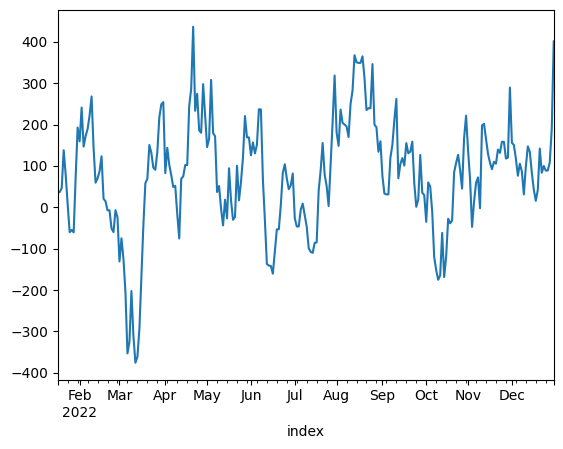

In [32]:
fred_df['SP_FV'].tail(250).plot()

In [ ]:
def fred_importer():
    

In [ ]:
fred_ids = ['WALCL','WTREGEN', 'RRPONTSYD', 'SP500', ]

In [11]:
df.to_sql(engine)

TypeError: NDFrame.to_sql() missing 1 required positional argument: 'con'

In [37]:
fred.get_series(series_id='WALCL', observation_start="2013-08-14")

2013-08-14    3646323.0
2013-08-21    3645668.0
2013-08-28    3644456.0
2013-09-04    3654182.0
2013-09-11    3662035.0
                ...    
2022-11-30    8584576.0
2022-12-07    8582735.0
2022-12-14    8583413.0
2022-12-21    8564411.0
2022-12-28    8551169.0
Length: 490, dtype: float64

In [ ]:
def sql_importer(symbol, start='2022-01-01'):
    try:
        max_date = pd.read_sql(f'SELECT MAX(Date) FROM {symbol}', engine).values[0][0]
        print(max_date)
        new_data = yf.download(symbol, start=pd.to_datetime(max_date))
        new_rows = new_data[new_data.index > max_date]
        new_rows.to_sql(symbol, engine, if_exists='append')
        print(str(len(new_rows)) + ' new rows imported to DB')
    except:
        new_data = yf.download(symbol, start=start)
        new_data.to_sql(symbol, engine)
        print(f'New table created for {symbol} with {str(len(new_data))} rows')